# Supervised Learning - Classification Problem

## Students' dropout and academic success

### (Droupout, Enrolled, Graduate)

Faculdade: FEUP - Faculdade de Engenharia da Universidade do Porto

Curso: L.EIC - Licenciatura em Engenharia Informática e Computação 

Unidade Curricular: Inteligência Artificial

Ano Curricular: 2021/22

Grupo: 21_1D

Elementos:
- Henrique Ribeiro Nunes, up201906852@up.pt
- Margarida Assis Ferreira, up201905046@up.pt
- Patrícia do Carmo Nunes Oliveira, up201905427@up.pt

### Especificação

O foco principal deste problema é analisar a informação conhecida sobre a matrícula do aluno (percurso acadêmico, demografia e fatores socioeconómicos) e o desempenho académico dos alunos no final do primeiro e segundo semestres. Com o objetivo de usar estes dados para construir modelos de classificação para **prever a desistência e o sucesso académico dos alunos**.

Este problema é um ***single label multiclass classification problem*** com 37 atributos:
- 36 métricas distintas para descrever as informações do aluno.
- 1 objetivo com 3 resultados possíveis (*Droupout*, *Enrolled*, *Graduate*).

Existe um **forte desbalanceamento** em relação a um dos resultados possíveis.


### Tools & Resources

// TODO AQUI 

## Data Analysis

A análise dos dados é um passo importante nos problemas de classificação. 

Nesta secção são analisados os atributos que classificam os dados e o tipo e intervalo de valores de cada um dos atributos, bem como o tamanho do conjunto de dados, a presença de valores nulos ou amostras duplicadas. Igualmente é explorado a distribuição das classes e de valores por atributos.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [60]:
SAVE_FILE = False

In [61]:
# Load data
data = pd.read_csv("data/data.csv")

In [62]:
# Print head values and summary statistics
print(data.describe())
print()
print(data.head())
print()

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

In [63]:
# Get all 36 features used and 3 possible results
features = list(data.columns)
features.remove("class")
print("Number of Features: {}".format(len(features)))
print("Features: {}".format(features))
values = list(data[features].values)

classes = list(data["class"].unique())
classes.sort()
print("\nNumber of Results: {}".format(len(classes)))
print("Result/Prediction: {}".format(classes))
targets = list(data["class"].values)

Number of Features: 36
Features: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate

In [64]:
# Check atribute types and values interval
for name, dtype in data.dtypes.iteritems():
    print("{} | {} | [{} , {}] ".format(name.ljust(46), str(dtype).ljust(7), data[name].min(), data[name].max()))

Marital status                                 | int64   | [1 , 6] 
Application mode                               | int64   | [1 , 57] 
Application order                              | int64   | [0 , 9] 
Course                                         | int64   | [33 , 9991] 
Daytime/evening attendance                     | int64   | [0 , 1] 
Previous qualification                         | int64   | [1 , 43] 
Previous qualification (grade)                 | float64 | [95.0 , 190.0] 
Nacionality                                    | int64   | [1 , 109] 
Mother's qualification                         | int64   | [1 , 44] 
Father's qualification                         | int64   | [1 , 44] 
Mother's occupation                            | int64   | [0 , 194] 
Father's occupation                            | int64   | [0 , 195] 
Admission grade                                | float64 | [95.0 , 190.0] 
Displaced                                      | int64   | [0 , 1] 
Educational special 

In [65]:
# Data size
print("Data Size: {}".format(len(data)))

Data Size: 4424


In [66]:
# Check if there are columns with N/A values
print("N/A values found: {}".format(data.isnull().values.any()))

N/A values found: False


In [67]:
# Check if there are duplicated Data
bool_series = data.duplicated()
print(bool_series)

old_size = len(data)

# Removing all duplicated data if exists
data = data[~bool_series] 

new_size = len(data)

# check if there were actualy duplicated data
print()
if (new_size == old_size):
    print("No data was removed: there were no duplicated data")
else:
    print("Was found and removed {} duplicated data".format(old_size-new_size))

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

No data was removed: there were no duplicated data


In [ ]:
# Resultant data without duplicated entries
data

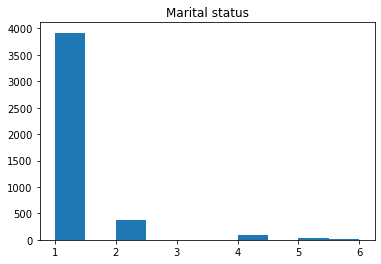

             1    2  3   4   5  6
Dropout   1184  179  1  42  11  4
Enrolled   720   52  2  16   3  1
Graduate  2015  148  1  33  11  1


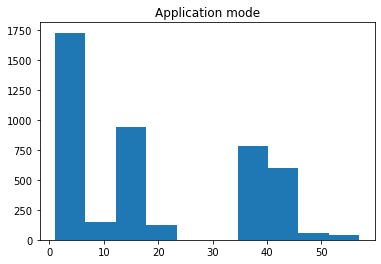

            1   2   5   7   10  15  16   17  18  26  27   39  42   43  44  51  \
Dropout    345   2   2  85   3   5   5  256  45   1   1  435  34  115  63  20   
Enrolled   300   0   8   7   0  10   8  159  16   0   0  121  11   75  56  13   
Graduate  1063   1   6  47   7  15  25  457  63   0   0  229  32  122  94  26   

          53  57  
Dropout    4   0  
Enrolled  10   0  
Graduate  21   1  


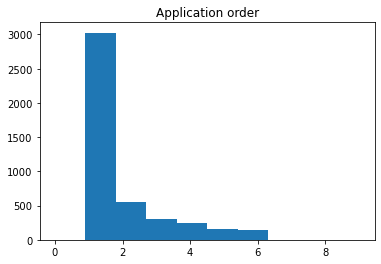

          0     1    2    3    4   5   6  9
Dropout   0  1053  150   76   58  53  31  0
Enrolled  0   565   96   60   31  25  16  1
Graduate  1  1408  301  173  160  76  90  0


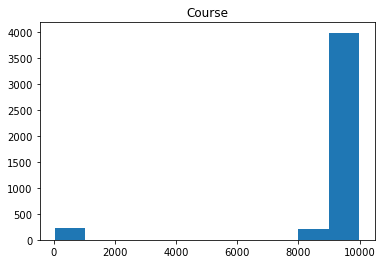

          33    171   8014  9003  9070  9085  9119  9130  9147  9238  9254  \
Dropout      8    82    71    86    51    90    92    78   134    65    96   
Enrolled     3    37    21    37    42    75    64    21   108    42    41   
Graduate     1    96   123    87   133   172    14    42   138   248   115   

          9500  9556  9670  9773  9853  9991  
Dropout    118    33    95   101    85   136  
Enrolled   100    17    48    34    50    54  
Graduate   548    36   125   196    57    78  


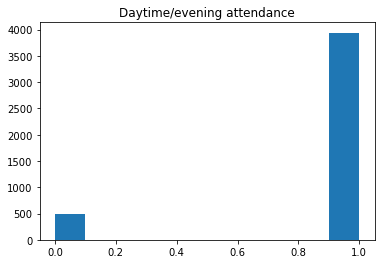

            0     1
Dropout   207  1214
Enrolled   75   719
Graduate  201  2008


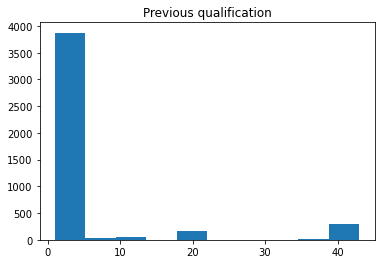

            1   2   3   4   5   6   9   10  12  14  15   19  38  39  40  42  \
Dropout   1078  16  75   4   1   7  11   3  26   1   1  104   3  69  14   6   
Enrolled   698   1   4   1   0   1   0   0   6   0   0   13   1  55   6   8   
Graduate  1941   6  47   3   0   8   0   1  13   0   1   45   3  95  20  22   

          43  
Dropout    2  
Enrolled   0  
Graduate   4  


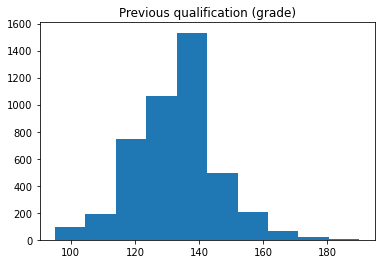

          95.0   96.0   97.0   99.0   100.0  101.0  102.0  103.0  105.0  \
Dropout       1      1      0      0     29      0      0      1      0   
Enrolled      0      1      0      1     14      3      0      1      1   
Graduate      0      0      1      1     33      3      5      1      3   

          106.0  ...  174.0  175.0  176.0  177.0  178.0  180.0  182.0  184.4  \
Dropout       2  ...      0      1      0      0      1      4      0      0   
Enrolled      4  ...      0      0      0      0      0      2      0      0   
Graduate      4  ...      1      0      1      2      1      3      1      1   

          188.0  190.0  
Dropout       1      1  
Enrolled      0      1  
Graduate      0      0  

[3 rows x 101 columns]


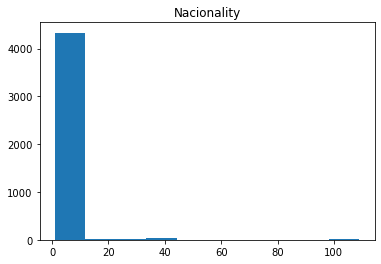

           1    2    6    11   13   14   17   21   22   24   ...  26   32   \
Dropout   1389    0    4    0    0    0    1    1    4    1  ...    1    0   
Enrolled   770    0    5    0    0    0    0    1    1    0  ...    5    1   
Graduate  2155    2    4    3    1    1    0    0    8    4  ...    8    0   

          41   62   100  101  103  105  108  109  
Dropout    14    0    2    1    1    1    0    1  
Enrolled    6    1    1    0    0    1    1    0  
Graduate   18    1    0    1    2    0    0    0  

[3 rows x 21 columns]


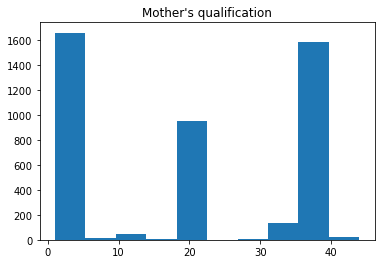

           1   2    3   4   5   6   9   10  11  12  ...  35  36   37   38  39  \
Dropout   300  20  139   8   8   3   5   2   2  22  ...   2   2  383  140   4   
Enrolled  204  23  101  15   5   0   0   0   0   3  ...   0   0  169   91   2   
Graduate  565  40  198  26   8   1   3   1   1  17  ...   1   1  457  331   2   

          40  41  42  43  44  
Dropout    3   2   2   1   1  
Enrolled   1   0   0   1   0  
Graduate   5   4   2   2   0  

[3 rows x 29 columns]


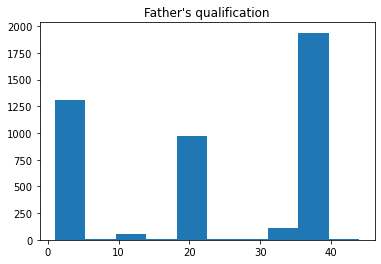

           1   2    3   4   5   6   9   10  11  12  ...  35  36   37   38  39  \
Dropout   281  22   90  14  10   2   1   2   4  14  ...   2   5  432  167   8   
Enrolled  172  25   62   7   3   0   0   0   0   4  ...   0   0  199  127   7   
Graduate  451  21  130  18   5   0   4   0   6  20  ...   0   3  578  408   5   

          40  41  42  43  44  
Dropout    3   1   0   0   1  
Enrolled   0   1   0   0   0  
Graduate   2   0   1   2   0  

[3 rows x 34 columns]


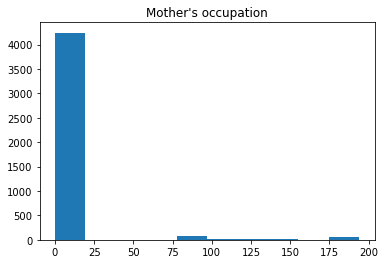

          0    1    2    3    4    5    6    7    8    9    ...  151  152  \
Dropout    99   39  102   95  248  156   26   80   15  490  ...    0    0   
Enrolled    1   15   78   79  147   94   14   48    7  264  ...    1    1   
Graduate   44   48  138  177  422  280   51  144   14  823  ...    2    1   

          153  171  173  175  191  192  193  194  
Dropout     0    0    0    1    0    0    1    1  
Enrolled    0    0    1    2   11    3    0    7  
Graduate    2    1    0    2   15    2    3    3  

[3 rows x 32 columns]


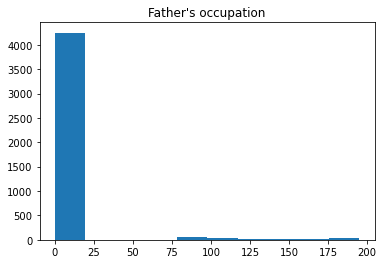

          0    1    2    3    4    5    6    7    8    9    ...  172  174  \
Dropout    82   48   70  114  139  148   69  184   94  323  ...    0    0   
Enrolled    3   23   50   63   74  107   48  111   55  163  ...    1    0   
Graduate   43   63   77  207  173  261  125  371  169  524  ...    1    1   

          175  181  182  183  192  193  194  195  
Dropout     0    0    0    0    0    2    1    0  
Enrolled    2    1    1    2    2    8    0    0  
Graduate    2    2    1    1    4    5    1    1  

[3 rows x 46 columns]


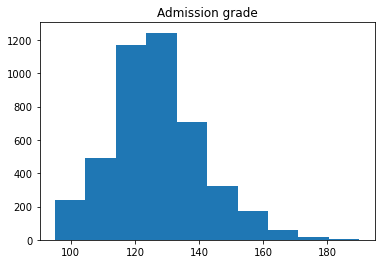

          95.0   95.1   95.5   95.8   96.0   96.1   96.7   97.0   97.2   \
Dropout       7      1      1      1      5      1      1      3      0   
Enrolled      1      0      0      0      2      0      0      1      0   
Graduate      3      0      1      0      0      0      0      2      1   

          97.4   ...  176.7  178.0  178.3  179.6  180.0  180.4  183.5  184.0  \
Dropout       1  ...      1      0      1      1      0      1      1      0   
Enrolled      0  ...      0      0      0      0      2      0      0      0   
Graduate      0  ...      0      1      0      0      2      0      0      1   

          184.4  190.0  
Dropout       0      1  
Enrolled      0      1  
Graduate      1      1  

[3 rows x 620 columns]


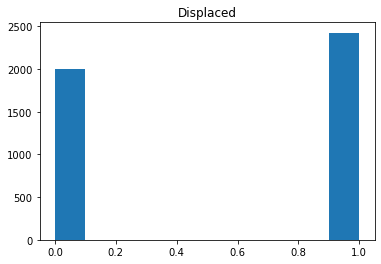

            0     1
Dropout   752   669
Enrolled  361   433
Graduate  885  1324


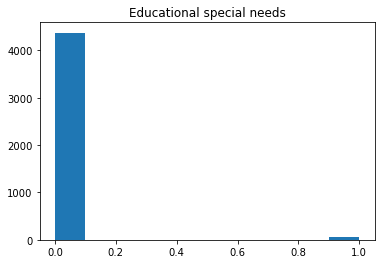

             0   1
Dropout   1404  17
Enrolled   783  11
Graduate  2186  23


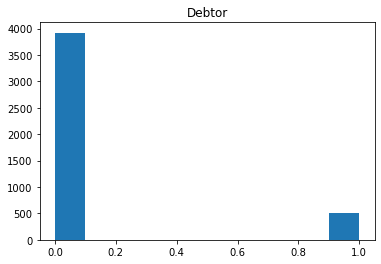

             0    1
Dropout   1109  312
Enrolled   704   90
Graduate  2108  101


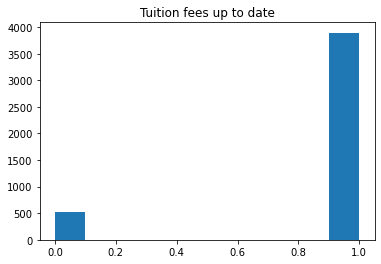

            0     1
Dropout   457   964
Enrolled   42   752
Graduate   29  2180


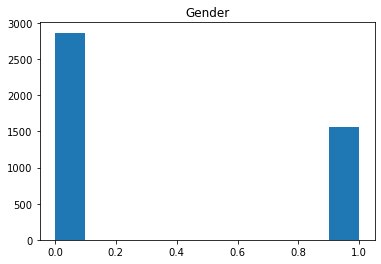

             0    1
Dropout    720  701
Enrolled   487  307
Graduate  1661  548


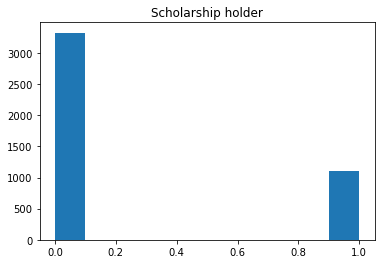

             0    1
Dropout   1287  134
Enrolled   664  130
Graduate  1374  835


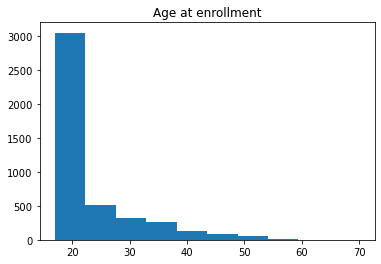

          17   18   19   20   21  22  23  24  25  26  ...  53  54  55  57  58  \
Dropout    0  202  207  133   93  58  41  56  47  52  ...   3   4   3   1   2   
Enrolled   2  172  157  140   70  37  24  30  21  19  ...   1   1   0   0   0   
Graduate   3  662  547  326  159  79  43  45  25  23  ...   3   2   2   1   1   

          59  60  61  62  70  
Dropout    2   0   1   0   1  
Enrolled   0   0   0   0   0  
Graduate   1   2   0   1   0  

[3 rows x 46 columns]


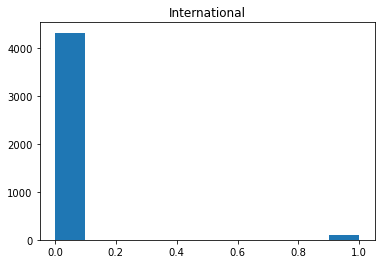

             0   1
Dropout   1389  32
Enrolled   770  24
Graduate  2155  54


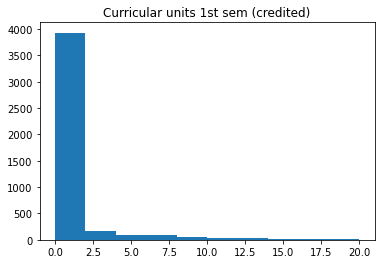

            0   1   2   3   4   5   6   7   8   9   ...  11  12  13  14  15  \
Dropout   1242  29  38  21  24   6  14   9   5   6  ...   5   2   5   6   1   
Enrolled   697  18  23  12   4  10   8  10   4   3  ...   1   1   1   1   0   
Graduate  1908  38  33  36  19  25  29  22  22  18  ...  11   9   7   8   4   

          16  17  18  19  20  
Dropout    0   0   1   0   0  
Enrolled   0   0   0   0   0  
Graduate   3   3   3   2   2  

[3 rows x 21 columns]


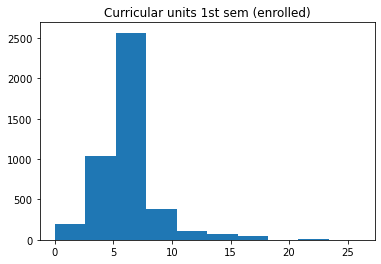

          0   1   2   3   4    5    6    7    8   9   ...  13  14  15  16  17  \
Dropout   77   6   5   9  21  421  605  164   26  12  ...   6   3  14   1   4   
Enrolled  28   1   2   1   0  261  316  110   32   5  ...   4   0   1   1   3   
Graduate  75   0   2   0   0  328  989  382  238  19  ...  10  19  10  11   9   

          18  19  21  23  26  
Dropout    2   0   1   0   0  
Enrolled   0   0   0   0   0  
Graduate  17   2   5   2   1  

[3 rows x 23 columns]


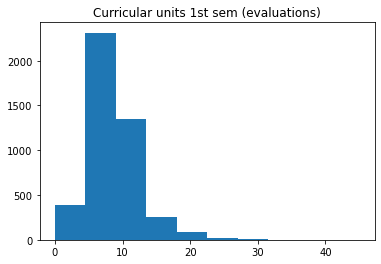

           0   1   2   3   4    5    6    7    8    9   ...  25  26  27  28  \
Dropout   246   5   5   6  17  110  137  135  150  119  ...   2   1   0   0   
Enrolled   28   1   2   0   1   27   68   82  117  106  ...   0   0   0   0   
Graduate   75   0   1   0   1   83  393  486  524  177  ...   1   3   2   1   

          29  31  32  33  36  45  
Dropout    0   1   0   0   0   0  
Enrolled   0   0   0   0   0   0  
Graduate   2   0   1   1   1   2  

[3 rows x 35 columns]


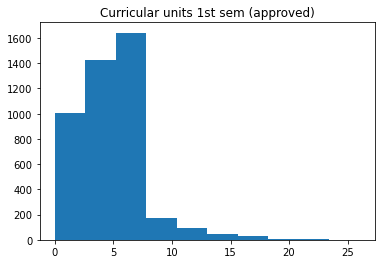

           0   1    2    3    4    5    6    7   8   9   ...  13  14  15  16  \
Dropout   570  93  112  139  158  145  117   33  10   8  ...   8   7   0   0   
Enrolled   71  33   42   93  145  193  138   42  14   5  ...   3   0   1   0   
Graduate   77   1    6   37  130  385  916  396  84  27  ...  15   7   6   5   

          17  18  19  20  21  26  
Dropout    1   0   0   0   1   0  
Enrolled   0   0   0   0   0   0  
Graduate   9  15   2   3   3   1  

[3 rows x 23 columns]


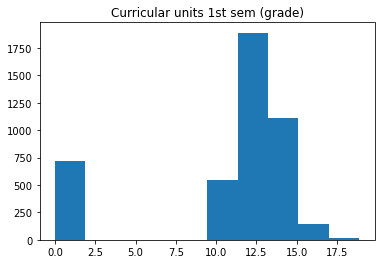

          0.000000   9.800000   10.000000  10.166667  10.200000  10.214286  \
Dropout         570          1         59          0          0          0   
Enrolled         71          0         22          0          5          0   
Graduate         77          0          1          1          3          1   

          10.250000  10.285714  10.333333  10.368421  ...  16.857143  \
Dropout           6          1          5          0  ...          0   
Enrolled          0          0          9          0  ...          0   
Graduate          1          0          2          1  ...          1   

          16.885714  16.900000  17.000000  17.005556  17.111111  17.125000  \
Dropout           0          0          0          0          0          0   
Enrolled          0          0          2          0          0          0   
Graduate          1          1          3          1          1          1   

          17.333333  18.000000  18.875000  
Dropout           1          2          0

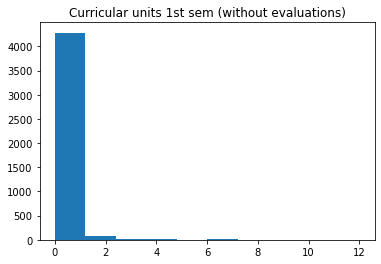

            0   1   2   3   4   5   6   7   8   10  12
Dropout   1297  60  29  12  13   1   3   4   2   0   0
Enrolled   724  35  21   7   1   2   1   1   2   0   0
Graduate  2109  58  29   4   1   2   2   1   0   1   2


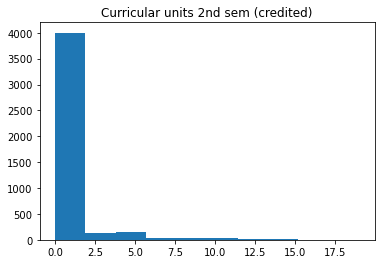

            0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
Dropout   1264  37  30  17  19  24   3   3   4   4   4   2   7   2   0   0   
Enrolled   711  25  12   9  17   7   2   4   2   2   2   0   1   0   0   0   
Graduate  1919  45  50  23  42  37  21   9   6   9   7  18   6   7   4   2   

          16  18  19  
Dropout    1   0   0  
Enrolled   0   0   0  
Graduate   1   2   1  


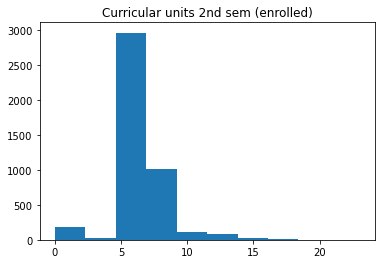

          0   1   2   3   4    5    6    7    8   9   ...  12  13  14  15  16  \
Dropout   77   3   5   2  14  454  602   99   95  16  ...   9   7   9   1   1   
Enrolled  28   0   0   1   2  265  317   80   65   6  ...   5   3   0   0   0   
Graduate  75   0   0   0   1  335  994  125  501  28  ...  30  27  13   1   0   

          17  18  19  21  23  
Dropout    2   1   0   0   0  
Enrolled   2   0   0   0   0  
Graduate   8   1   3   1   2  

[3 rows x 22 columns]


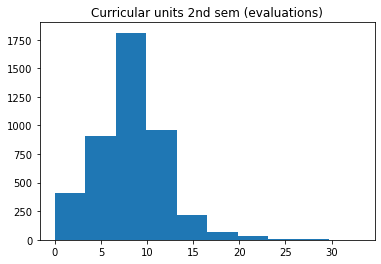

           0   1   2   3   4    5    6    7    8    9   ...  20  21  22  23  \
Dropout   297   3   4   1   8  161  135  115  127  110  ...   2   4   2   2   
Enrolled   29   0   0   1   2   20   58   85  138  103  ...   0   2   2   0   
Graduate   75   0   0   0   0  107  421  363  527  243  ...   6   4   6   2   

          24  25  26  27  28  33  
Dropout    2   1   0   0   0   0  
Enrolled   0   0   0   1   1   0  
Graduate   1   0   3   1   0   1  

[3 rows x 30 columns]


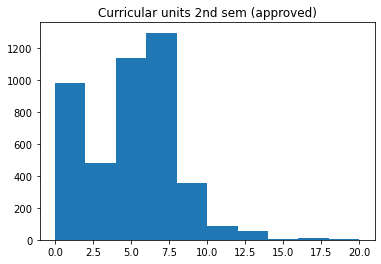

           0   1    2    3    4    5    6    7    8   9   10  11  12  13  14  \
Dropout   727  86  116  127  112  119   64   19   20   6  10   5   7   1   0   
Enrolled   68  28   77  124  160  157   98   44   15  11   6   4   2   0   0   
Graduate   75   0    5   34  142  450  803  268  286  19  22  39  25  20   6   

          16  17  18  19  20  
Dropout    2   0   0   0   0  
Enrolled   0   0   0   0   0  
Graduate   0   8   2   3   2  


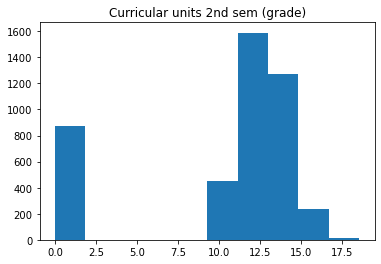

          0.000000   10.000000  10.166667  10.200000  10.250000  10.333333  \
Dropout         727         48          2          1          4          9   
Enrolled         68         26          1          2          5          9   
Graduate         75          3          1          1          1          1   

          10.375000  10.400000  10.428571  10.444444  ...  16.800000  \
Dropout           0          1          1          1  ...          0   
Enrolled          1          4          1          1  ...          0   
Graduate          0          3          0          0  ...          2   

          16.909091  17.000000  17.166667  17.428571  17.587500  17.600000  \
Dropout           0          1          0          1          0          0   
Enrolled          0          1          0          0          0          1   
Graduate          1          0          1          0          1          1   

          17.692308  17.714286  18.571429  
Dropout           0          1          0

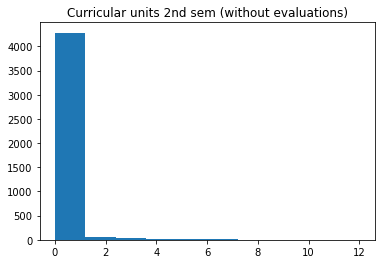

            0   1   2   3   4   5   6   7   8   12
Dropout   1298  51  20  16  13   9   5   4   4   1
Enrolled   726  33  13  12   5   1   1   1   2   0
Graduate  2118  56  15   7   3   7   2   0   0   1


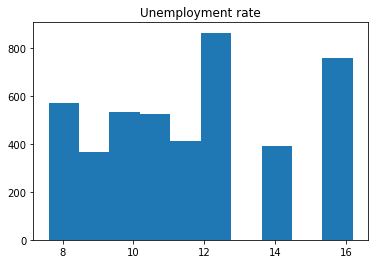

          7.6   8.9   9.4   10.8  11.1  12.4  12.7  13.9  15.5  16.2
Dropout    202   102   174   182   117   107   141   118   139   139
Enrolled   119    77   109    90    67    90    63    64    69    46
Graduate   250   189   250   253   230   248   215   208   189   177


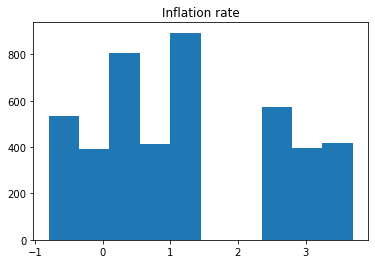

          -0.8  -0.3   0.3   0.5   0.6   1.4   2.6   2.8   3.7
Dropout    174   118   139   107   117   284   202   139   141
Enrolled   109    64    46    90    67   167   119    69    63
Graduate   250   208   177   248   230   442   250   189   215


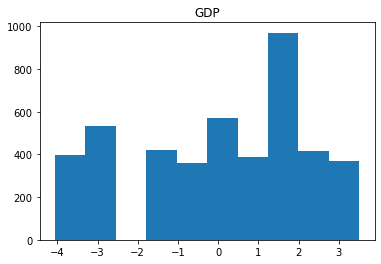

          -4.06  -3.12  -1.70  -0.92   0.32   0.79   1.74   1.79   2.02   3.51
Dropout     139    174    141    139    202    118    182    107    117    102
Enrolled     69    109     63     46    119     64     90     90     67     77
Graduate    189    250    215    177    250    208    253    248    230    189


In [68]:
# Histogram for each feture values and respective count of classses

def count_targets_for_each_value(data, feat):
    data_aux = data[[feat, "class"]]
    d = {}
    for line in data_aux.values:
        if not line[0] in d:
            d[line[0]] = {classes[0]: 0, classes[1]: 0, classes[2]: 0}
        d[line[0]][line[1]] += 1

    for entry in d.keys():
        d[entry] = [d[entry][c] for c in classes]
    aux = pd.DataFrame(d, index=classes)
    return aux.reindex(sorted(aux.columns), axis=1)


for i in range(36):
    plt.title(features[i])
    plt.hist(data[features[i]].values)
    plt.show()
    print(count_targets_for_each_value(data, features[i]))

Number of 'Graduate' occurences: 2209
Number of 'Dropout' occurences: 1421
Number of 'Enrolled' occurences: 794

      class  count
0  Graduate   2209
1   Dropout   1421
2  Enrolled    794


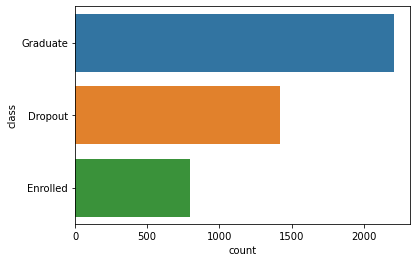

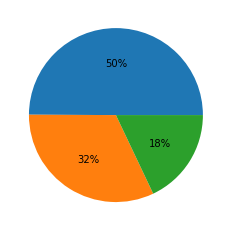

In [69]:
# Class Distribution
# Check data balance
n_graduate = data['class'].value_counts().Graduate
n_dropouts = data['class'].value_counts().Dropout
n_enrroled = data['class'].value_counts().Enrolled
print("Number of 'Graduate' occurences: {}".format(n_graduate))
print("Number of 'Dropout' occurences: {}".format(n_dropouts))
print("Number of 'Enrolled' occurences: {}".format(n_enrroled))
print()

# Corresponding plot 
count_result = pd.DataFrame(data["class"]).value_counts().rename_axis("class").reset_index(name="count")
print(count_result)

# Bar plot
plot_count_res = sb.barplot(data=count_result, x="count", y="class")
plt.show()

# Pie plot with percentages
plt.pie([n_graduate, n_dropouts, n_enrroled], autopct = '%0.00f%%')
plt.show()

Analisando a distribuição de cada atributo pelas classes possíveis, podemos concluir que existem alguns atributos irrelevantes, na medida que não se distingue à priori nem se obtem qualquer informação sobre qual a classe mais provável para uma nova amostra com base no valor desse atributo, como conseguimos identifificar no caso do atributo 'Curricular units 2nd sem (credited)'

In [ ]:
# Distribution of each attribute 
def densityPlot(x, hue, fill):
    sb.displot(data, x=x, hue=hue, kind="kde", fill=fill)
    
# all 36 distinct attributes
attributes = list(data.columns)
attributes.remove("class")
    
for attribute in attributes:
    densityPlot(attribute, 'class', True)

**Propriedades do Problema:** (a partir da análise dos dados de entrada)

- Nominal and Discrete attributes (including some binary ones)
- Dimensionality = 37 attibutos
- Size = 4424
- Type = Data Matrix
- No missing or duplicate Data
- No meaningful outliers
- Imbalance data

## Pré-processamento dos dados

Tendo em conta as conclusões obtidas pela a análise dos dados originais mostrada anteriormente, podemos apercebermo-nos que é necessário realizar um pré-processamento dos dados, com o objetivo de resolver o maior problema adjacente a estes: a falta de balanceamento entre as diferentes classes de alvo. 

Para tal podemos usar entre outras estratégias uma das seguintes:
- **oversampling** : «Aumentar o número de amostras/entradas da menor classe até coincidir com o tamanho da maior classe»
- **undersampling** : «Diminuir o número de amostras/entradas da maior classe até coincidir com o tamanho da menor classe»

Em qualquer uma das abordagens acima, a escolha das amostras escolhidas para serem retidas ou replicadas com pequenas modificações é aleatória.

In [85]:
from sklearn.preprocessing import StandardScaler

data_standard = data.copy()

non_binary_features = [feature for feature in features if len(data[feature].unique()) != 2]
data_no_binary_features = data_standard[non_binary_features]

scaler = StandardScaler()
stand_values = scaler.fit_transform(data_no_binary_features.values)

stand_values_df = pd.DataFrame(
    stand_values, 
    index=data_no_binary_features.index, 
    columns=non_binary_features)
data_standard[non_binary_features] = stand_values_df[non_binary_features]

### Undersampling

Uma das técnicas para lidar com o desbalanceamento de classes em machine lerning é chamado de *undersampling*. Esta técnica de balanceamento consiste em remover algumas observações das classes majoritárias, até que as classes majoritárias e minoritárias sejam equilibradas. A técnica *undersampling* pode ser uma boa escolha quando temos dados desequilibrados, mas uma desvantagem é que removemos informações que podem ser valiosas.

Para remover as observações das classes majoritárias, usamos a função `sample(sequence, k)`, uma função do módulo `Random` de Python, que retorna uma lista de comprimento `k` de itens escolhidos aleatoriamente de `sequence`.

In [ ]:
# Imbalance Original Data
print("Classes count:")
print(data['class'].value_counts())

data['class'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
class_graduate = data[data['class'] == "Graduate"]
class_dropout = data[data['class'] == "Dropout"]
class_enrolled = data[data['class'] == "Enrolled"]

class_dropout_under = class_dropout.sample(n_enrroled, replace=True)
class_graduate_under = class_graduate.sample(n_enrroled, replace=True)

Agora temos os nossos dados balanceados, como é possível observer no gráfico criado pelo código abaixo.

In [ ]:
data_under = pd.concat([class_dropout_under, class_graduate_under, class_enrolled], axis=0)

# plot the count after under-sampeling
print("Classes count after under-sampling:")
print(data_under['class'].value_counts())

data_under['class'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
# Save to file
if SAVE_FILE: data_under.to_csv("data/data_under.csv", index=False)

### Oversampling

// TODO AQUI -> improve description
Segue o seguinte esquema: [incluir imagem significativa]

As entradas da classe menor sáo replicadas até totalizarem o número de amostras da classe maior.

In [ ]:
# Imbalance Original Data
unbalanced_count = data['class'].value_counts()
unbalanced_count.plot.bar()
plt.show()

In [ ]:
# Separate count and samples by the diferent classes
graduate_count, dropout_count, enrolled_count = data['class'].value_counts()

print("GRADUATE: {} | DROPOUT: {} | ENROLLED: {}".format(graduate_count, dropout_count, enrolled_count))

graduate_samples = data[data['class'] == "Graduate"]
dropout_samples = data[data['class'] == "Dropout"]
enrolled_samples = data[data['class'] == "Enrolled"]

#### Random Over-Sampling

«Oversampling can be defined as adding more copies to the minority class.»

**Disvantagens:** pode causar *overfitting* e pobre generalização do conjunto de dados para teste.

In [ ]:
# number of the smallest to the larger ones
dropout_samples_over = dropout_samples.sample(graduate_count, replace=True)
enrolled_samples_over = enrolled_samples.sample(graduate_count, replace=True)

data_over = pd.concat([graduate_samples, dropout_samples_over, enrolled_samples_over], axis=0)

print("Total dintinct classes: \n{}".format(data_over['class'].value_counts()))

rnd_oversampling_count = data_over['class'].value_counts()
rnd_oversampling_count.plot.bar()
plt.show()

In [ ]:
# Save to file
if SAVE_FILE: data_over.to_csv("data/data_over.csv", index=False)

#### Synthetic Minority Oversampling Technique (SMOTE)

// TODO AQUI - NOT WORKING

In [ ]:
import imblearn

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
# TODO find want is supposted to be x and y 
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))


from imblearn.over_sampling import SMOTE

smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

É importante referir que nenhuma das soluções acima é uma solução perfeita, pois a aplicação de undersampling pode inplicar a perda de infromação, da mesma forma que a aplicação de oversampling (sem qualquer modificação das amostras escolhidas aleatóriamente para serem replicadas) pode levar a um posterior overfitting dos modelos gerados a estes novos dados.


#### Combine under and over sampling

Tendo isto em conta a seguinte tentativa tenta encontrar um meio termos entre as soluções anteriores, fazendo as classes em questão convergir para um valor mediano e não para um máximo nem minímo, tentando combater as consequencias sentidas nos dados ao aplicar isoladamente cada uma das estratégias, obtando por alcaçar um meio termo.

In [ ]:
# make the counts meet at the middle point
# in this case the middle point is consider to be the dropout class
graduate_samples_middle = graduate_samples.sample(droupout_count, replace=True)
enrolled_samples_middle = enrolled_samples.sample(droupout_count, replace=True)

data_under_over = pd.concat([graduate_samples_middle, droupout_samples, enrolled_samples_middle], axis=0)

print("Total dintinct classes: \n{}".format(data_under_over['class'].value_counts()))

under_over_count = data_under_over['class'].value_counts()
under_over_count.plot.bar()
plt.show()

In [ ]:
# Save to file
if SAVE_FILE: data_under.to_csv("data/data_under_over.csv", i)

## Learning Algorithms

### Identification of the Target Concept

// TODO AQUI

In [87]:
#data = pd.read_csv('data/data_over.csv')
data = data_standard
values = list(data[list(data.columns[:-1])].values)
targets = list(data['class'].values)

### Validation

#### Train test split

In [88]:
from sklearn.model_selection import train_test_split
def split_data(data, classes, test_size):
  feat_train, feat_test, target_train, target_test = train_test_split(data, classes, test_size=test_size, shuffle=True)
  return feat_train, feat_test, target_train, target_test

#### Cross validation

In [89]:
from sklearn.model_selection import cross_val_score
def cross_validation(model, features, targets, cv):
    scores = cross_val_score(model, features, targets, cv=cv)
    return scores

#### Confusion Matrix

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def confusion_matrix(target_test, target_predictions):    
    return metrics.confusion_matrix(target_test, target_predictions)

def display_confusion_matrix(cm):
    metrics.ConfusionMatrixDisplay(cm, display_labels=classes).plot()

#### Validate model

In [91]:
from sklearn import metrics

def precision(cm, i):
    return cm[i][i]/sum(cm[i])

def recall(cm, i):
    cmt = np.copy(cm).transpose()
    return cmt[i][i]/sum(cmt[i])

def validate(model, features, targets):
    test_size = 0.2
    cross_validation_split = 5
    feat_train, feat_test, target_train, target_test = split_data(features, targets, test_size)
    
    model.fit(feat_train, target_train)
    predictions = model.predict(feat_test)
    
    acc = metrics.accuracy_score(target_test, predictions)
    print("Accuracy: {:.2f}\n".format(acc*100))
    
    cm = confusion_matrix(target_test, predictions)
    print("Precision:")
    for i in range(3): print("\t{:.2f}% - {}".format(precision(cm, i)*100, classes[i]))
    print("Recall:")
    for i in range(3): print("\t{:.2f}% - {}".format(recall(cm, i)*100, classes[i]))
    
    display_confusion_matrix(cm)
    
    scores = cross_validation(model, features, targets, cross_validation_split)
    print("Cross validation {}-fold: {}".format(cross_validation_split, [round(x, 3) for x in scores]))
    print("\t{:.2f} accuracy with a standard deviation of {:.2f}".format(scores.mean(), scores.std()))

#### Selection and Parameterization of the learning algorithms to employ

:: At least 3 supervised learning (classification) algorithms should be employed (Decision Trees, Neural Networks, KNN, SVM, …) 

### Algorithms

#### Decision Tree Classifier

Accuracy: 74.80

Precision:
	70.69% - Dropout
	30.41% - Enrolled
	95.52% - Graduate
Recall:
	85.42% - Dropout
	60.47% - Enrolled
	72.45% - Graduate
Cross validation 5-fold: [0.74, 0.73, 0.739, 0.741, 0.721]
	0.73 accuracy with a standard deviation of 0.01


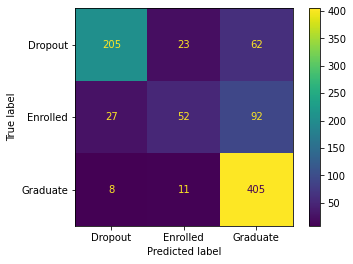

In [92]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
dtc = DecisionTreeClassifier(
  criterion="gini", # criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
  splitter="best", # splitter{“best”, “random”}, default=”best”
  max_depth=5, 
  max_features=20, # max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None
  max_leaf_nodes=None) # max_leaf_nodes: int, default=None
validate(dtc, values, targets)

In [ ]:
# Plot tree
from sklearn.tree import plot_tree
plot_tree(dtc)

In [ ]:
# Create PDF with the tree
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtc, out_file=None, feature_names=labels, class_names=targets ) 
graph = graphviz.Source(dot_data) 
graph.render("decision_tree") 

#### K-nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 1

knc = KNeighborsClassifier(n_neighbors,weights="uniform")
validate(knc, values, targets)

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
'''
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X=np.array([line[:2] for line in data_train]),
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

sns.scatterplot(
        x=data[labels[0]],
        y=data[labels[1]],
        alpha=1.0,
        edgecolor="black",
    )
plt.show()
'''

#### Neural Network

Accuracy: 77.18

Precision:
	74.29% - Dropout
	30.50% - Enrolled
	93.10% - Graduate
Recall:
	84.55% - Dropout
	42.16% - Enrolled
	80.45% - Graduate
Cross validation 5-fold: [0.749, 0.764, 0.765, 0.759, 0.743]
	0.76 accuracy with a standard deviation of 0.01


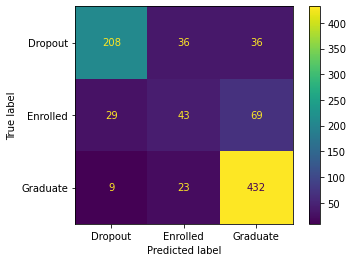

In [93]:
from sklearn.neural_network import MLPClassifier

nnc = MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(5, 2),
    max_iter=5000,
    random_state=1)

validate(nnc, values, targets)

#### Evaluation of the learning process

:: compared using appropriate evaluation
metrics (performance during learning, confusion matrix, precision, recall, accuracy, F1 measure) and the time
spent to train/test the models.
(in particular on the test set)

:: compared using the Scikit-Learn Python library and considering
the characteristics of the dataset.

#### Results Comparision

:: Results should be compared using tables or plots (e.g., using Seaborn or
Matplotlib libraries).